In [1]:
!pip install yfinance
import yfinance as yf


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
try:
    soybean=yf.Ticker('ZS=F')
    data=soybean.history(period='36mo',interval='1d')
except Exception as e:
    print(f"Une erreur s'est produite : {e}")

In [9]:
data.columns
data.drop(['High','Low','Dividends','Stock Splits'],axis=1,inplace=True)


data.head()
data.groupby(by="Date")['Volume]

In [10]:
data.tail()

,Close,Volume
Date,,
2023-08-17 00:00:00-04:00,1336.75,12549
2023-08-18 00:00:00-04:00,1362.75,11335
2023-08-21 00:00:00-04:00,1370.00,13759
2023-08-22 00:00:00-04:00,1351.50,13759
2023-08-23 00:00:00-04:00,1361.25,108221


<Axes: xlabel='Date'>

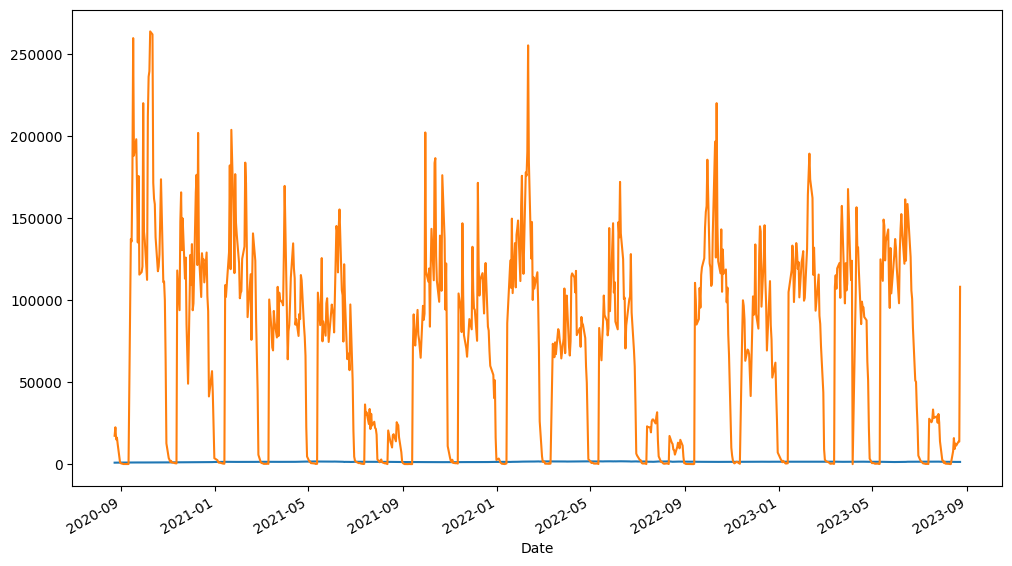

In [11]:
data['Close'].plot(figsize=(12,7))
data['Volume'].plot(figsize=(12,7))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9888\1054756143.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2022']['Close'].plot(figsize=(12,9))


<Axes: xlabel='Date'>

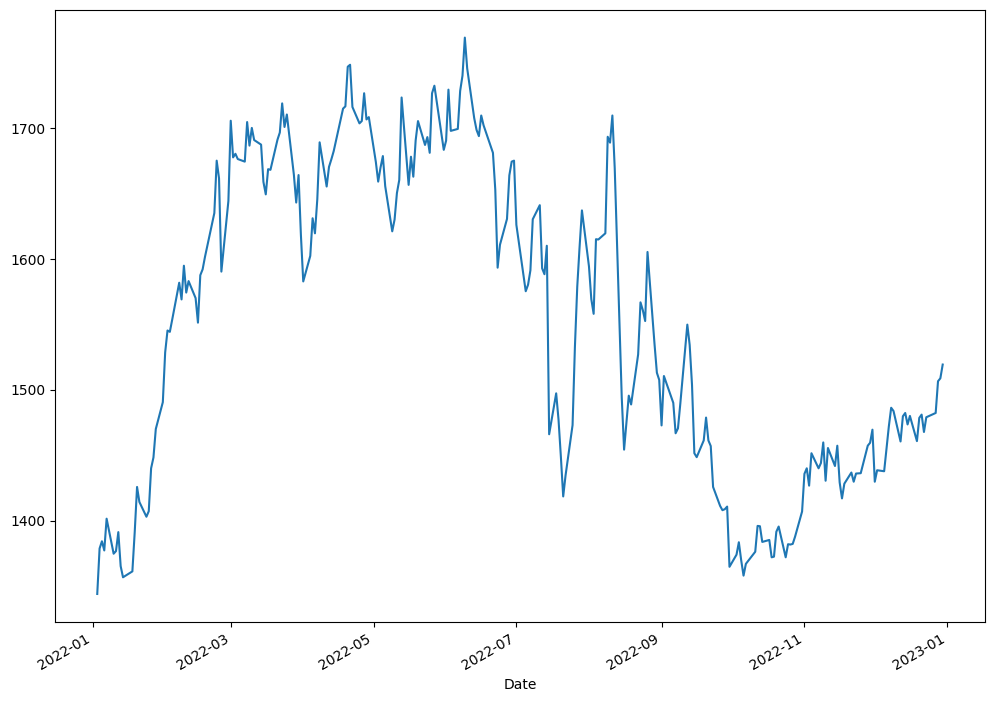

In [12]:
data['2022']['Close'].plot(figsize=(12,9))

In [13]:
data['2022']['Close'].describe()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9888\3041394052.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2022']['Close'].describe()


count     251.000000
mean     1550.662351
std       119.178623
min      1344.000000
25%      1446.125000
50%      1552.500000
75%      1668.875000
max      1769.000000
Name: Close, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9888\2325796328.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2022']['Close'].plot()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9888\2325796328.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2022']['Close'].rolling(7).mean().plot()


<Axes: xlabel='Date'>

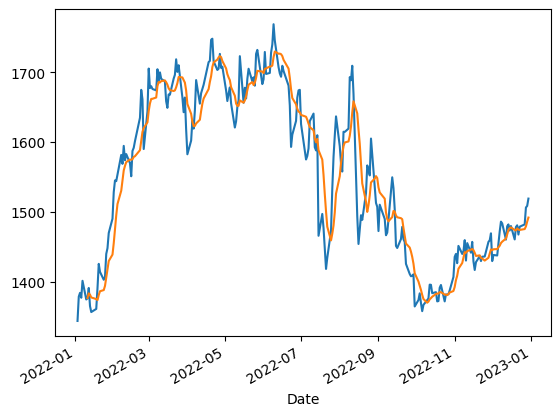

In [14]:
data['2022']['Close'].plot()
data['2022']['Close'].rolling(7).mean().plot()

<Axes: xlabel='Date'>

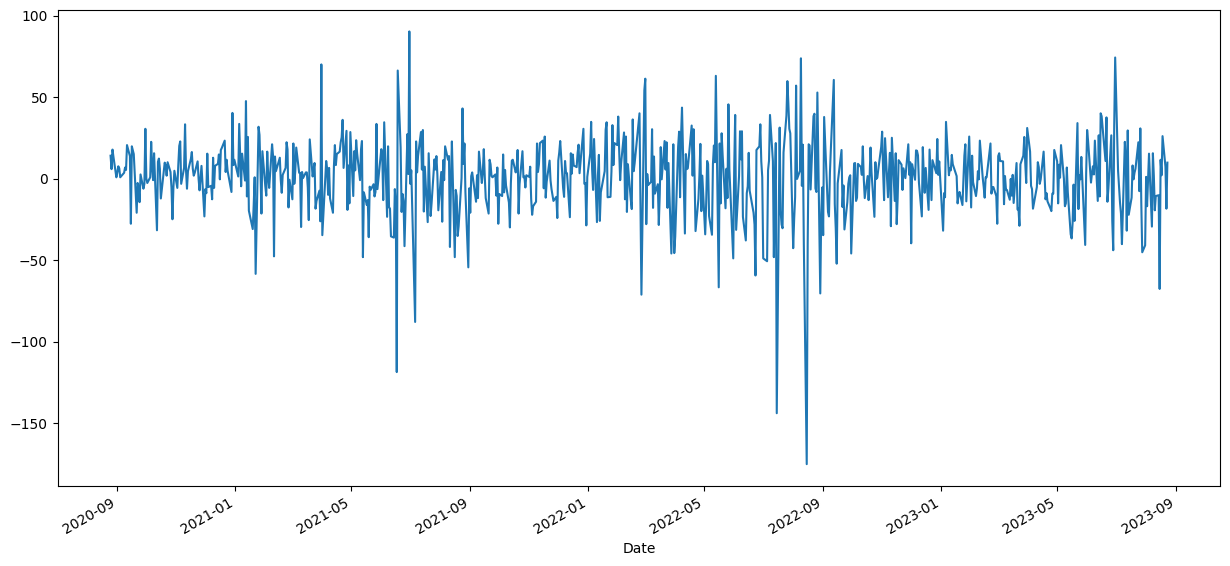

In [15]:
vol=pd.Series.diff(data['Close'])
vol.plot(figsize=(15,7))

In [16]:
len(data['Close'])

755

In [17]:
data['Close'].describe()

count     755.000000
mean     1418.367881
std       174.838635
min       899.750000
25%      1330.875000
50%      1434.250000
75%      1526.625000
max      1769.000000
Name: Close, dtype: float64

In [16]:
!pip install statistic
!pip install statsmodels

In [18]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(data['Close'])
print('ADF Statistic : %f' % adf[0])
print('p-value :%f' % adf[1])
if adf[1] > 0.05:
    print('The series is not stationnary')
else:
    print('The series is stationnary')

ADF Statistic : -3.034543
p-value :0.031792
The series is stationnary


<Axes: xlabel='Date'>

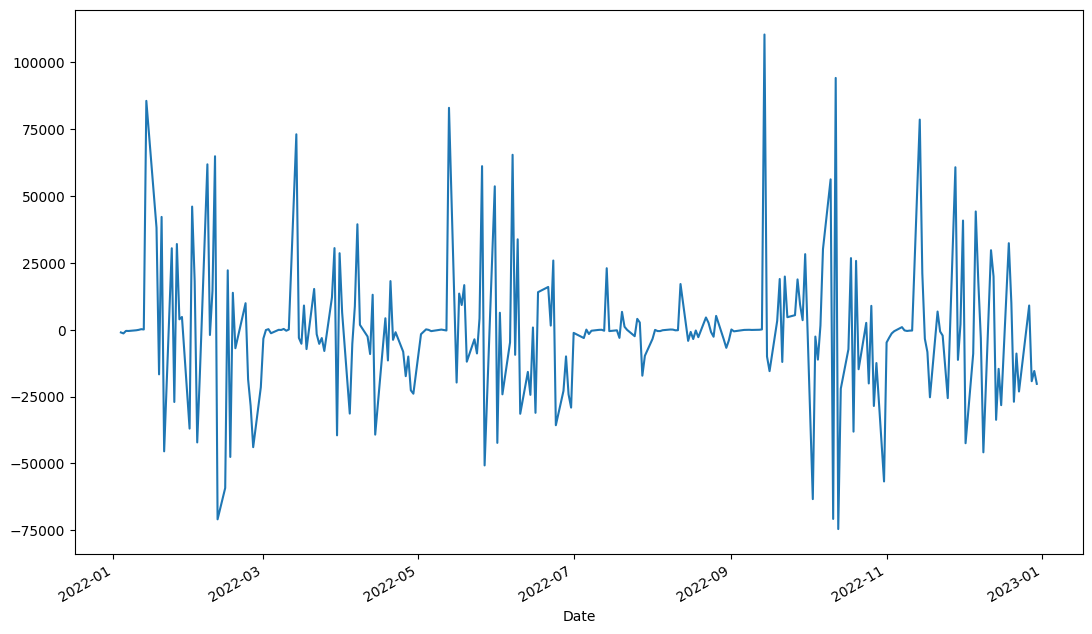

In [19]:
vol_volume =pd.Series.diff(data['Volume']['2022'])
vol_volume.plot(figsize=(13,8))

In [20]:
adf = adfuller(data['Volume'])
print('ADF Statistic : %f' % adf[0])
print('p-value :%f' % adf[1])
if adf[1] > 0.05:
    print('The series is not stationnary')
else:
    print('The series is stationnary')

ADF Statistic : -7.189977
p-value :0.000000
The series is stationnary


In [21]:
!pip install polar

Defaulting to user installation because normal site-packages is not writeable
  Using cached polar-0.0.118-py3-none-any.whl (10 kB)
                                              0.0/9.2 MB ? eta -:--:--
     ---                                      0.7/9.2 MB 10.9 MB/s eta 0:00:01
     -----                                    1.3/9.2 MB 13.8 MB/s eta 0:00:01
     --------------                           3.4/9.2 MB 17.8 MB/s eta 0:00:01
     ----------------                         3.8/9.2 MB 17.4 MB/s eta 0:00:01
     ------------------------                 5.6/9.2 MB 18.9 MB/s eta 0:00:01
     --------------------------------         7.6/9.2 MB 20.2 MB/s eta 0:00:01
     -------------------------------------    8.6/9.2 MB 20.3 MB/s eta 0:00:01
     ---------------------------------------  9.2/9.2 MB 20.2 MB/s eta 0:00:01
     ---------------------------------------  9.2/9.2 MB 20.2 MB/s eta 0:00:01
     ---------------------------------------- 9.2/9.2 MB 16.8 MB/s eta 0:00:00
       


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
data.nlargest(5,columns=['Volume'],keep='first',)

,Close,Volume
Date,,
2020-10-09 00:00:00-04:00,1065.50,264053
2020-10-12 00:00:00-04:00,1033.75,262222
2020-09-17 00:00:00-04:00,1028.50,259968
2022-02-10 00:00:00-05:00,1574.25,255540
2020-10-08 00:00:00-04:00,1050.00,239775


In [31]:
data.nsmallest(5,columns=['Close'],keep='first')

,Close,Volume
Date,,
2020-08-24 00:00:00-04:00,899.75,17315
2020-08-25 00:00:00-04:00,913.75,22496
2020-08-26 00:00:00-04:00,919.50,15086
2020-08-27 00:00:00-04:00,937.25,16175
2020-08-28 00:00:00-04:00,950.50,12103


In [ ]:
sum_spread=data['spread'].sum()
sum_spread

spread   -336.75
spread   -336.75
dtype: float64

In [ ]:
!pip install pywedge

     -------------------------------------- 101.0/101.0 MB 8.8 MB/s eta 0:00:00
     ---------------------------------------- 70.9/70.9 MB 8.6 MB/s eta 0:00:00
     ------------------------------------- 226.0/226.0 kB 14.4 MB/s eta 0:00:00
     --------------------------------------- 15.5/15.5 MB 18.7 MB/s eta 0:00:00
  Using cached scikit_learn-1.3.0-cp310-cp310-win_amd64.whl (9.2 MB)
     -------------------------------------- 138.3/138.3 kB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00
     ------------------------------------- 302.0/302.0 kB 19.4 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 19.3 MB/s eta 0:00:00
     -------------------------------------- 198.2/198.2 kB 6.1 MB/s eta 0:00:00


In [24]:
data.dtypes

Close     float64
Volume      int64
dtype: object

In [25]:
data.median()

Close      1434.25
Volume    82218.00
dtype: float64

In [27]:
data['Close'].value_counts(normalize=True)

1448.50    0.005298
1497.25    0.003974
1477.25    0.003974
1372.00    0.003974
1383.75    0.003974
             ...   
1296.00    0.001325
1294.50    0.001325
1276.50    0.001325
1272.50    0.001325
1351.50    0.001325
Name: Close, Length: 630, dtype: float64

In [28]:
import matplotlib.pyplot as plt
plt.style.available
print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
